In [1]:
import GA_sine as GA_sine
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def plot_sga_progress(generations, fitness):

    fig, ax = plt.subplots()

    x = np.linspace(0, 128, 1000)
    y = np.sin(x) + 1

    ax.plot(x, y, color='blue' , label='Sine wave')
    points, = ax.plot([], [], 'ro')

    def init():
        points.set_data([], [])
        return points,

    def animate(i):
        gen_val = generations[i]
        real_values = []
        for bitstring in gen_val:
            int_value = int(''.join(map(str, bitstring)), 2)
            scaled_value = int_value * (128 / 2**len(bitstring))
            real_values.append(scaled_value)

        fitness_val = fitness[i]
        points.set_data(real_values, fitness_val)
        return points,

    anim = FuncAnimation(fig, animate, frames=len(generations), init_func=init, blit=True, interval=200)

    anim.save('genetic_algorithm_progress.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

    plt.show()

def plot_average_fitness_progress(y_lim, average_fitness, max_fitness, sum_fitness):

    fig, ax = plt.subplots()

    ax.set_ylim(0, y_lim)

    sum_fitness = np.array(sum_fitness) / 10

    ax.plot(average_fitness, color='blue', label='Average fitness')
    ax.plot(max_fitness, color='green', label='Best fitness')
    ax.plot(sum_fitness, color='red', label='Sum fitness / 10')

    plt.legend(loc='upper left')

    plt.show()

## Sine Wave Problem 

In [3]:
num_features = 24
generation_number = 75
population_size = 32
crossover_rate = 0.8
mutation_rate = 0.01

In [4]:
myGA = GA_sine.GA_sine()

Initialized GA for sine function task!


started GA with num_features: 24, population_size: 32, generation number: 75, crossover rate: 0.8, mutation rate: 0.01
initiliazed population with shape: (32, 24)
Generation: 0
Population shape: (32, 24)
Generation: 1
Population shape: (32, 24)
Generation: 2
Population shape: (32, 24)
Generation: 3
Population shape: (32, 24)
Generation: 4
Population shape: (32, 24)
Generation: 5
Population shape: (32, 24)
Generation: 6
Population shape: (32, 24)
Generation: 7
Population shape: (32, 24)
Generation: 8
Population shape: (32, 24)
Generation: 9
Population shape: (32, 24)
Generation: 10
Population shape: (32, 24)
Generation: 11
Population shape: (32, 24)
Generation: 12
Population shape: (32, 24)
Generation: 13
Population shape: (32, 24)
Generation: 14
Population shape: (32, 24)
Generation: 15
Population shape: (32, 24)
Generation: 16
Population shape: (32, 24)
Generation: 17
Population shape: (32, 24)
Generation: 18
Population shape: (32, 24)
Generation: 19
Population shape: (32, 24)
Generat

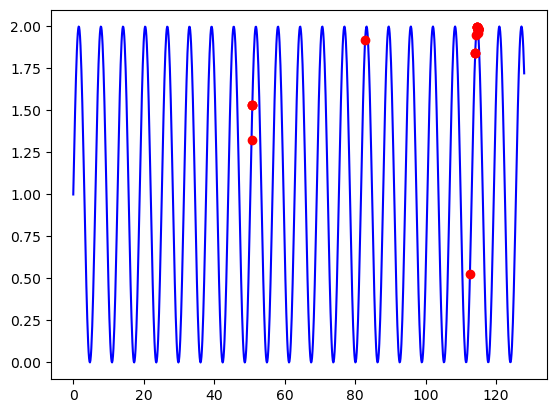

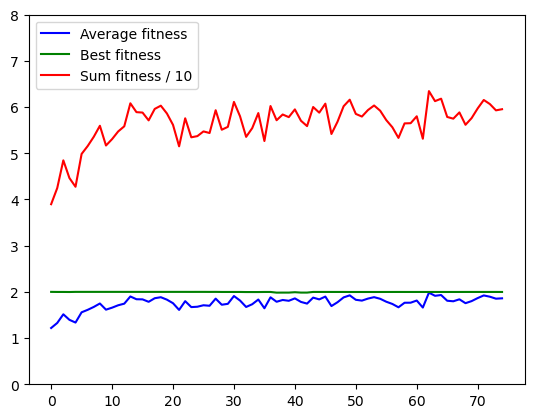

In [6]:
g, f, a_f, m_f, s_f = myGA.run(num_features, generation_number, population_size, crossover_rate, mutation_rate, crowding=False)

plot_sga_progress(g, f)
plot_average_fitness_progress(8, a_f, m_f, s_f)

#### with crowding

started GA with num_features: 24, population_size: 32, generation number: 75, crossover rate: 0.8, mutation rate: 0.01
initiliazed population with shape: (32, 24)
Generation: 0
Population shape: (32, 24)
Generation: 1
Population shape: (32, 24)
Generation: 2
Population shape: (32, 24)
Generation: 3
Population shape: (32, 24)
Generation: 4
Population shape: (32, 24)
Generation: 5
Population shape: (32, 24)
Generation: 6
Population shape: (32, 24)
Generation: 7
Population shape: (32, 24)
Generation: 8
Population shape: (32, 24)
Generation: 9
Population shape: (32, 24)
Generation: 10
Population shape: (32, 24)
Generation: 11
Population shape: (32, 24)
Generation: 12
Population shape: (32, 24)
Generation: 13
Population shape: (32, 24)
Generation: 14
Population shape: (32, 24)
Generation: 15
Population shape: (32, 24)
Generation: 16
Population shape: (32, 24)
Generation: 17
Population shape: (32, 24)
Generation: 18
Population shape: (32, 24)
Generation: 19
Population shape: (32, 24)
Generat

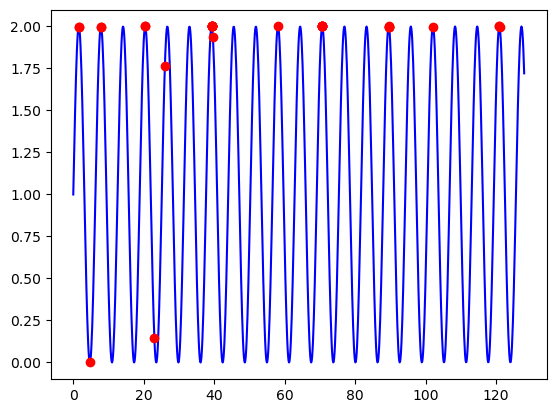

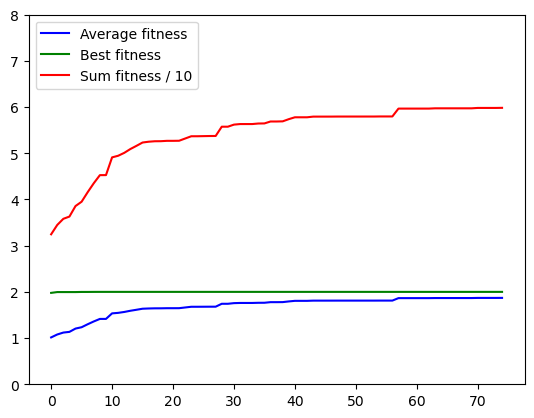

In [7]:
g, f, a_f, m_f, s_f = myGA.run(num_features, generation_number, population_size, crossover_rate, mutation_rate, crowding=True)

plot_sga_progress(g, f)
plot_average_fitness_progress(8, a_f, m_f, s_f)

## Feature Selction

In [10]:
import GA_feature_selection

myGA2 = GA_feature_selection.GA_feature_selection()

generation_number = 30
population_size = 14
crossover_rate = 0.9
mutation_rate = 0.015

Initialized GA for feature selection task!


#### without crowding

started GA with data shape: (1994, 102), num_features: 101, population_size: 14, generation number: 30, crossover rate: 0.9, mutation rate: 0.015
initiliazed population with shape: (14, 102)
Generation: 0


Population shape: (14, 102)
Generation: 1
Population shape: (14, 102)
Generation: 2
Population shape: (14, 102)
Generation: 3
Population shape: (14, 102)
Generation: 4
Population shape: (14, 102)
Generation: 5
Population shape: (14, 102)
Generation: 6
Population shape: (14, 102)
Generation: 7
Population shape: (14, 102)
Generation: 8
Population shape: (14, 102)
Generation: 9
Population shape: (14, 102)
Generation: 10
Population shape: (14, 102)
Generation: 11
Population shape: (14, 102)
Generation: 12
Population shape: (14, 102)
Generation: 13
Population shape: (14, 102)
Generation: 14
Population shape: (14, 102)
Generation: 15
Population shape: (14, 102)
Generation: 16
Population shape: (14, 102)
Generation: 17
Population shape: (14, 102)
Generation: 18
Population shape: (14, 102)
Generation: 19
Population shape: (14, 102)
Generation: 20
Population shape: (14, 102)
Generation: 21
Population shape: (14, 102)
Generation: 22
Population shape: (14, 102)
Generation: 23
Population shape: (1

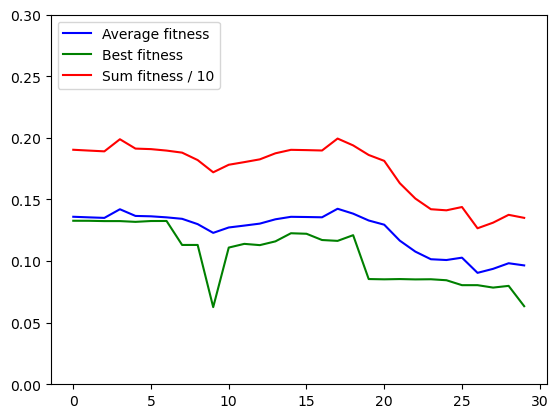

In [11]:
g, f, a_f, m_f, s_f = myGA2.run("dataset.txt", generation_number, population_size, crossover_rate, mutation_rate, crowding=False)

plot_average_fitness_progress(0.3, a_f, m_f, s_f)

In [12]:
import pandas as pd
import LinReg

regressor = LinReg.LinReg()
myRNG = np.random.default_rng()
data = pd.read_csv('dataset.txt', header=None)
all_features = np.ones(data.shape[1])
X = regressor.get_columns(data.values, all_features)
regressor.get_fitness(X[:,:-1], X[:,-1])

0.13901409848845456

#### with crowding

started GA with data shape: (1994, 102), num_features: 101, population_size: 14, generation number: 30, crossover rate: 0.9, mutation rate: 0.015
initiliazed population with shape: (14, 102)
Generation: 0
Population shape: (14, 102)
Generation: 1
Population shape: (14, 102)
Generation: 2
Population shape: (14, 102)
Generation: 3
Population shape: (14, 102)
Generation: 4
Population shape: (14, 102)
Generation: 5
Population shape: (14, 102)
Generation: 6
Population shape: (14, 102)
Generation: 7
Population shape: (14, 102)
Generation: 8
Population shape: (14, 102)
Generation: 9
Population shape: (14, 102)
Generation: 10
Population shape: (14, 102)
Generation: 11
Population shape: (14, 102)
Generation: 12
Population shape: (14, 102)
Generation: 13
Population shape: (14, 102)
Generation: 14
Population shape: (14, 102)
Generation: 15
Population shape: (14, 102)
Generation: 16
Population shape: (14, 102)
Generation: 17
Population shape: (14, 102)
Generation: 18
Population shape: (14, 102)
Ge

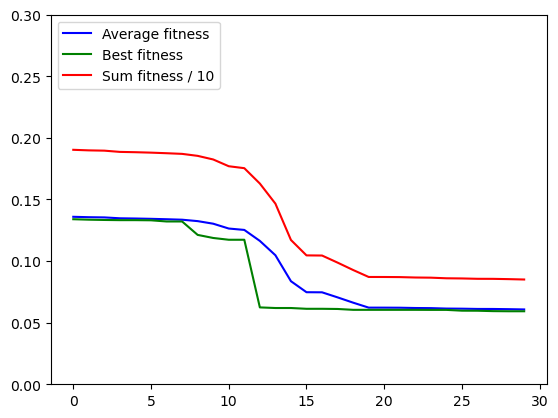

In [13]:
g, f, a_f, m_f, s_f = myGA2.run("dataset.txt", generation_number, population_size, crossover_rate, mutation_rate, crowding=True)

plot_average_fitness_progress(0.3, a_f, m_f, s_f)